In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print('target_names: ' + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns = ['target'])
iris_data = pd.concat([x, y], axis = 1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],
                                                    iris_data[['target']],
                                                    test_size = 0.3,
                                                    random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
#載入SVM
from sklearn.svm import SVC

In [10]:
#先指定kernel，probability為true可以看到預測每類的機率為多少
svm = SVC(kernel = 'linear', probability = True)

In [12]:
svm.fit(X_train_std, y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
#預測的值
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [14]:
#原始值
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


In [16]:
#預測出的機率
svm.predict_proba(X_test_std)

array([[0.95008337, 0.04991663],
       [0.00775223, 0.99224777],
       [0.97396219, 0.02603781],
       [0.00668996, 0.99331004],
       [0.01718705, 0.98281295],
       [0.11934589, 0.88065411],
       [0.98439965, 0.01560035],
       [0.00500257, 0.99499743],
       [0.00896142, 0.99103858],
       [0.0159657 , 0.9840343 ],
       [0.02455128, 0.97544872],
       [0.03041598, 0.96958402],
       [0.00832574, 0.99167426],
       [0.98053579, 0.01946421],
       [0.96258429, 0.03741571],
       [0.94239084, 0.05760916],
       [0.98833966, 0.01166034],
       [0.87649917, 0.12350083],
       [0.98057976, 0.01942024],
       [0.95672107, 0.04327893],
       [0.95008337, 0.04991663],
       [0.03505668, 0.96494332],
       [0.9500464 , 0.0499536 ],
       [0.0376258 , 0.9623742 ],
       [0.96762127, 0.03237873],
       [0.96991787, 0.03008213],
       [0.96255633, 0.03744367],
       [0.02128525, 0.97871475],
       [0.04034585, 0.95965415],
       [0.00623309, 0.99376691]])

In [17]:
from matplotlib.colors import ListedColormap

#視覺化程式
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.6,
                    c = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label = cl)
    
    #highlight test samples
    if test_idx:
        #plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please updat to Numpy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha = 1.0,
                    c = "",
                    edgecolor = 'black',
                    linewidths = 1,
                    marker = 'o',
                    label = 'test set',
                    s = 55)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


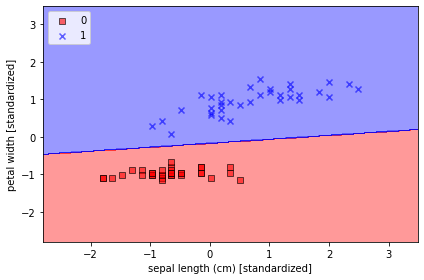

In [19]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier = svm)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()